In [49]:
!pip install watermark
!pip install vaderSentiment
!pip install imbalanced-learn

In [50]:
!pip install datasets

In [51]:
import re
import unicodedata
import itertools
from datasets import Dataset
import pandas as pd
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
sns.set_theme(style='whitegrid')
palette='viridis'
import warnings
warnings.filterwarnings("ignore")
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())
import watermark
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.12
Author: Library versions

nltk          : 3.9.1
catboost      : 1.2.7
platform      : 1.0.8
sklearn       : 1.5.2
google        : 2.0.3
xgboost       : 2.1.2
seaborn       : 0.13.2
gensim        : 4.3.3
re            : 2.2.1
numpy         : 1.26.4
lightgbm      : 4.5.0
wordcloud     : 1.9.4
plotly        : 5.24.1
spacy         : 3.7.5
watermark     : 2.5.0
matplotlib    : 3.8.0
vaderSentiment: 3.3.2
pandas        : 2.2.2
datasets      : 3.1.0



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Dataset

In [52]:
!pip install kaggle

In [54]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [55]:
!kaggle datasets download yasserh/amazon-product-reviews-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/amazon-product-reviews-dataset
License(s): CC0-1.0
amazon-product-reviews-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [56]:
!unzip amazon-product-reviews-dataset.zip

Archive:  amazon-product-reviews-dataset.zip
replace 7817_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 7817_1.csv              


In [57]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("/content/7817_1.csv")

df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,manufacturer,manufacturerNumber,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,NaN,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,NaN,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,NaN,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,NaN,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,NaN,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [58]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,manufacturer,manufacturerNumber,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,NaN,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,NaN,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,NaN,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,NaN,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,NaN,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [59]:
df.tail()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,manufacturer,manufacturerNumber,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-07-06T00:00:00.000Z,NaN,9.0,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-06-22T00:00:00.000Z,NaN,41.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-03-31T00:00:00.000Z,NaN,34.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-04-26T00:00:00Z,NaN,7.0,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces
1596,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-07-31T00:00:00Z,NaN,10.0,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I ordered this item to replace the one that no...,I am sending all of this crap back to amazon a...,NaN,NaN,DIANE K,NaN,NaN,4 ounces


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [61]:
df.dtypes

,0
id,object
asins,object
brand,object
categories,object
colors,object
dateAdded,object
dateUpdated,object
dimension,object
ean,float64
keys,object


In [62]:
df.shape

(1597, 27)

In [63]:
data = df.copy()

#Data cleaning

In [64]:
print("Checking for missing values in each column:")
print(df.isnull().sum())

Checking for missing values in each column:
id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


In [65]:
df = df.dropna(axis=1)

print("Remaining columns after removing columns with NaN:")
print(df.isnull().sum())

Remaining columns after removing columns with NaN:
id                    0
asins                 0
brand                 0
categories            0
dateAdded             0
dateUpdated           0
keys                  0
name                  0
prices                0
reviews.sourceURLs    0
reviews.text          0
dtype: int64


#Text Preprocessing

In [68]:
%%time

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')

nltk.download('punkt_tab')

nltk.download('stopwords')

stemmer = PorterStemmer()

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):

        text = text.lower()

        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        text = re.sub(r'\[.*?\]\(.*?\)', '', text)

        text = re.sub(r'@\w+', '', text)

        text = text.translate(str.maketrans('', '', string.punctuation))

        return text
    else:
        return text

def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text

def remove_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return tokens

def stem_tokens(tokens):
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    else:
        return tokens

df['Cleaned_Review'] = df['reviews.text'].apply(clean_text)

df['Tokenized_Review'] = df['Cleaned_Review'].apply(tokenize_text)

df['Stemmed_Review'] = df['Tokenized_Review'].apply(stem_tokens)

df['No_Stopwords_Review'] = df['Tokenized_Review'].apply(remove_stopwords)

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: user 8.05 s, sys: 52.4 ms, total: 8.11 s
Wall time: 14.2 s


,id,asins,brand,categories,dateAdded,dateUpdated,keys,name,prices,reviews.sourceURLs,reviews.text,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between...","[i, initi, had, troubl, decid, between, the, p...","[initially, trouble, deciding, paperwhite, voy..."
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little...","[allow, me, to, prefac, thi, with, a, littl, h...","[allow, preface, little, history, casual, read..."
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...,"[i, am, enjoying, it, so, far, great, for, rea...","[i, am, enjoy, it, so, far, great, for, read, ...","[enjoying, far, great, reading, original, fire..."
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ...","[i, bought, one, of, the, first, paperwhit, an...","[bought, one, first, paperwhites, pleased, con..."
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate ...,"[i, have, to, say, upfront, i, dont, like, cor...","[i, have, to, say, upfront, i, dont, like, cor...","[say, upfront, dont, like, coroporate, hermeti..."


#Sentiment Analysis with Vader

In [69]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(review):
    return analyzer.polarity_scores(review)

df['vader_scores'] = df['Cleaned_Review'].apply(get_sentiment)

df['compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound'].apply(classify_sentiment)

print(df[['Cleaned_Review', 'compound', 'sentiment']].head(10))

                                      Cleaned_Review  compound sentiment
0  i initially had trouble deciding between the p...    0.9879  Positive
1  allow me to preface this with a little history...    0.9881  Positive
2  i am enjoying it so far great for reading had ...    0.4364  Positive
3  i bought one of the first paperwhites and have...    0.9746  Positive
4  i have to say upfront  i dont like coroporate ...    0.9980  Positive
5  my previous kindle was a dx this is my second ...    0.2627  Positive
6  allow me to preface this with a little history...    0.9881  Positive
7  just got mine right now looks the same as the ...    0.9205  Positive
8  i initially had trouble deciding between the p...    0.9879  Positive
9  i am enjoying it so far great for reading had ...    0.4364  Positive


#Exploratory data analysis

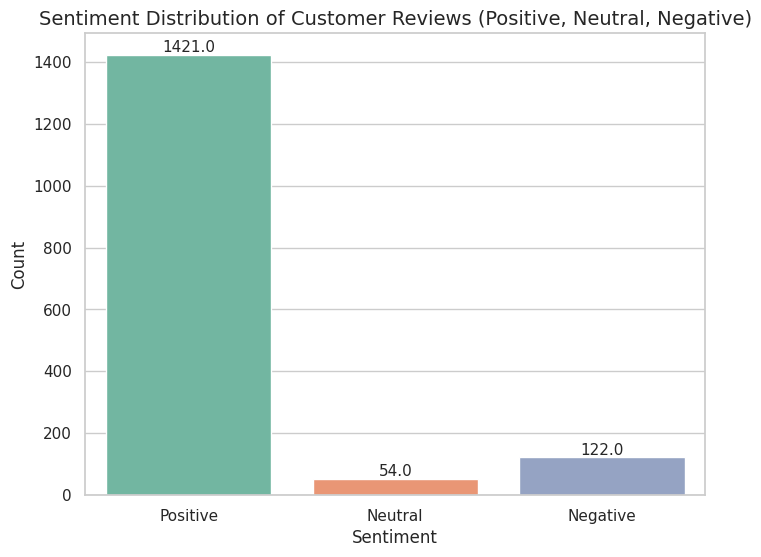

In [70]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='sentiment', palette='Set2')

plt.title('Sentiment Distribution of Customer Reviews (Positive, Neutral, Negative)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=11)

plt.show()

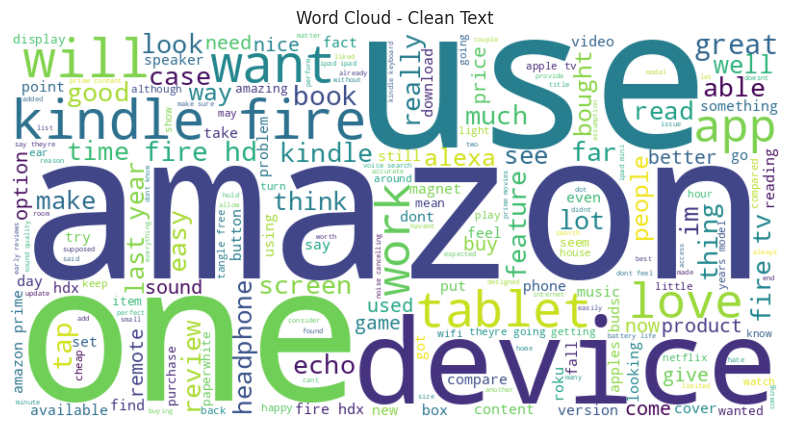

In [71]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(' '.join(df['Cleaned_Review'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Clean Text")
plt.show()

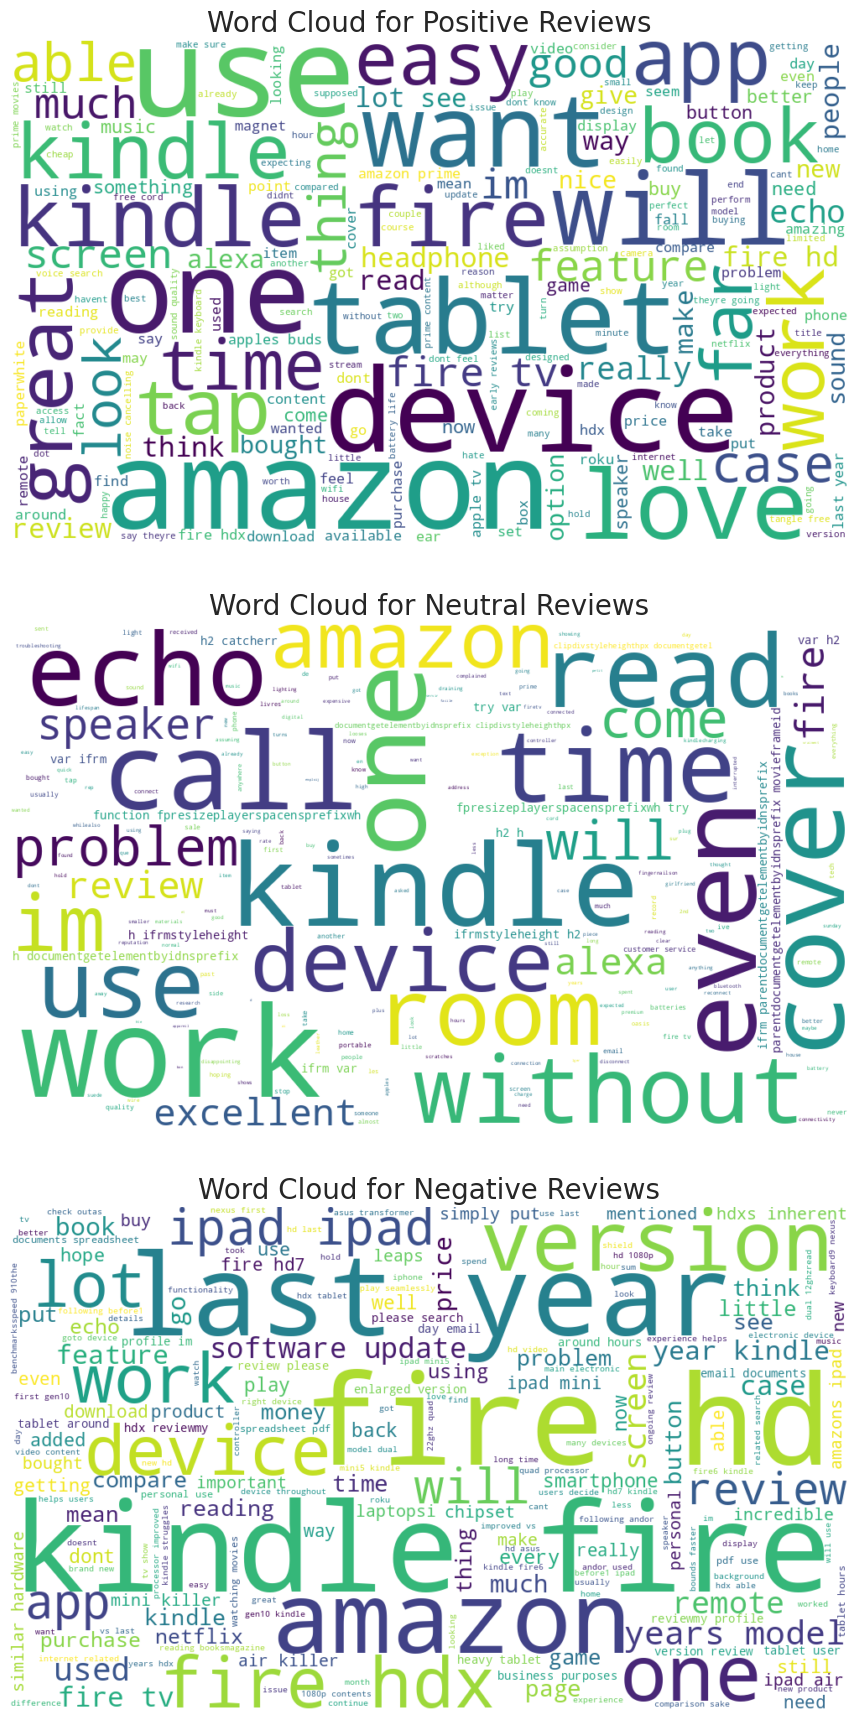

In [72]:
positive_reviews = " ".join(df[df['sentiment'] == 'Positive']['Cleaned_Review'].tolist())
neutral_reviews = " ".join(df[df['sentiment'] == 'Neutral']['Cleaned_Review'].tolist())
negative_reviews = " ".join(df[df['sentiment'] == 'Negative']['Cleaned_Review'].tolist())

wordcloud_positive = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(positive_reviews)
wordcloud_neutral = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(neutral_reviews)
wordcloud_negative = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(negative_reviews)

plt.figure(figsize=(10, 18))

plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=20)
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Reviews', fontsize=20)
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=20)
plt.axis('off')

plt.tight_layout(pad=3)
plt.show()

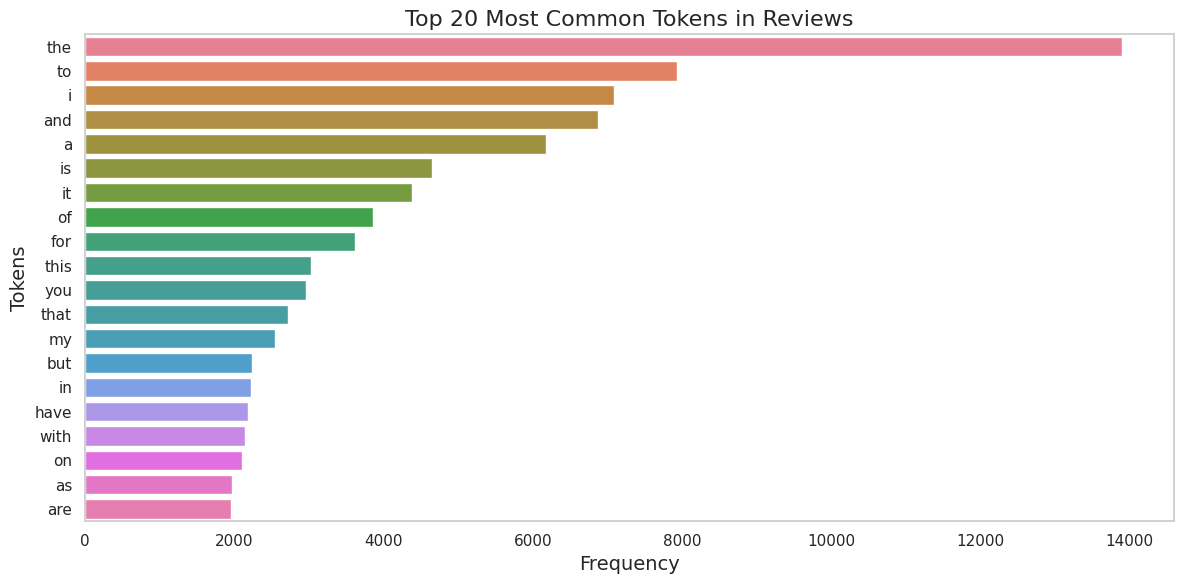

In [73]:
from collections import Counter

all_tokens = [token for tokens in df['Tokenized_Review'] for token in tokens]

token_counts = Counter(all_tokens)

common_tokens = token_counts.most_common(20)

tokens, frequencies = zip(*common_tokens)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=list(tokens), palette='husl')

plt.title('Top 20 Most Common Tokens in Reviews', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Tokens', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.grid(False)
plt.show()

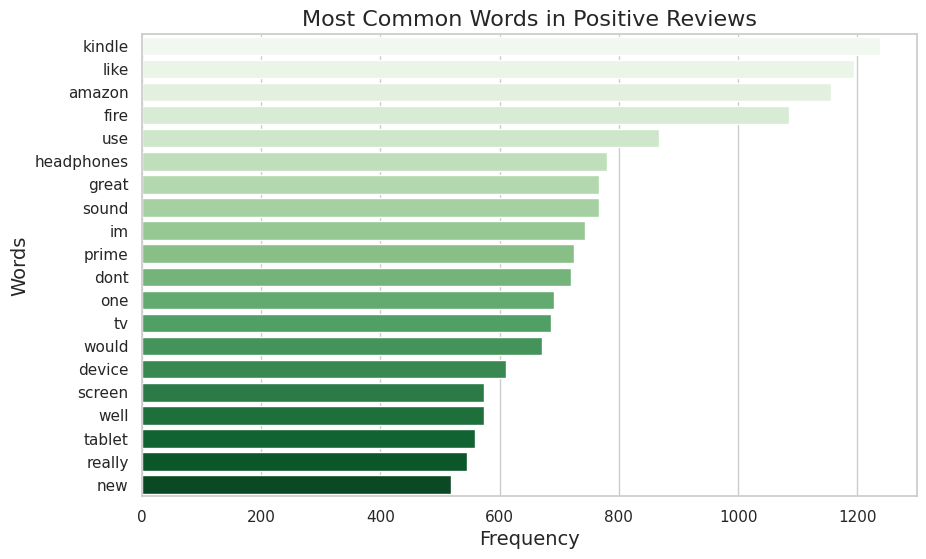

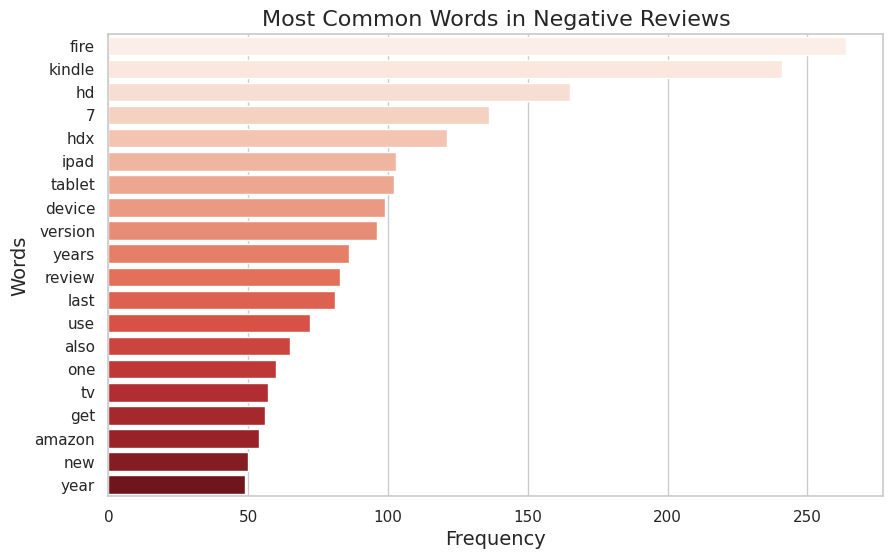

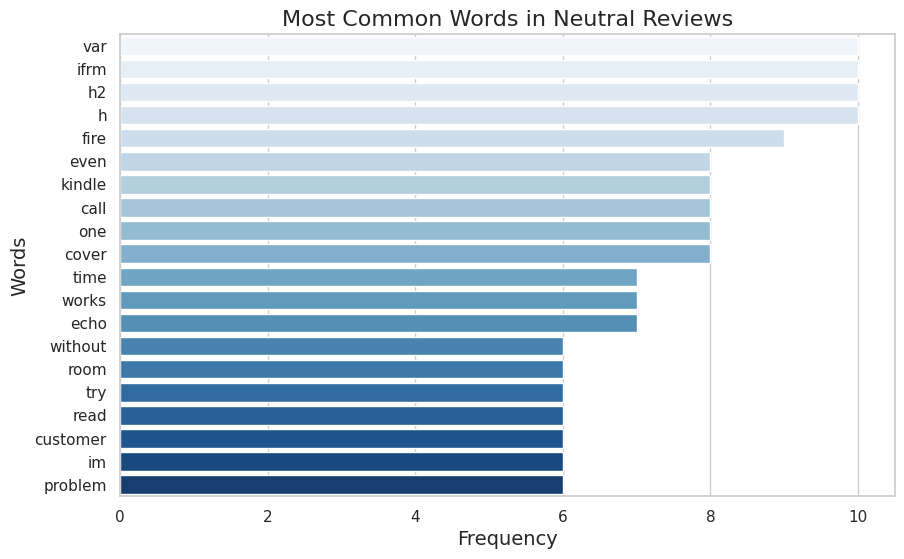

In [74]:
from collections import Counter

def plot_most_common_words(common_words, sentiment, color):

    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette=color)

    plt.title(f'Most Common Words in {sentiment} Reviews', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)

    plt.show()

positive_reviews = df[df['sentiment'] == 'Positive']['No_Stopwords_Review']
negative_reviews = df[df['sentiment'] == 'Negative']['No_Stopwords_Review']
neutral_reviews = df[df['sentiment'] == 'Neutral']['No_Stopwords_Review']

positive_words_list = [word for review in positive_reviews for word in review]
negative_words_list = [word for review in negative_reviews for word in review]
neutral_words_list = [word for review in neutral_reviews for word in review]

positive_words = Counter(positive_words_list).most_common(20)
negative_words = Counter(negative_words_list).most_common(20)
neutral_words = Counter(neutral_words_list).most_common(20)

plot_most_common_words(positive_words, 'Positive', 'Greens')

plot_most_common_words(negative_words, 'Negative', 'Reds')

plot_most_common_words(neutral_words, 'Neutral', 'Blues')

#Machine learning models

Target column split and test

In [75]:
df = df.drop(columns=['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'keys', 'name', 'prices', 'vader_scores', 'reviews.sourceURLs'])

df.head()

,reviews.text,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review,compound,sentiment
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between...","[i, initi, had, troubl, decid, between, the, p...","[initially, trouble, deciding, paperwhite, voy...",0.9879,Positive
1,Allow me to preface this with a little history...,allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little...","[allow, me, to, prefac, thi, with, a, littl, h...","[allow, preface, little, history, casual, read...",0.9881,Positive
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...,"[i, am, enjoying, it, so, far, great, for, rea...","[i, am, enjoy, it, so, far, great, for, read, ...","[enjoying, far, great, reading, original, fire...",0.4364,Positive
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ...","[i, bought, one, of, the, first, paperwhit, an...","[bought, one, first, paperwhites, pleased, con...",0.9746,Positive
4,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate ...,"[i, have, to, say, upfront, i, dont, like, cor...","[i, have, to, say, upfront, i, dont, like, cor...","[say, upfront, dont, like, coroporate, hermeti...",0.9980,Positive


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X = tfidf_vectorizer.fit_transform(df['Cleaned_Review'])
y = df['sentiment']

tfidf_vectorizer

TfidfVectorizer(max_features=5000)

In [77]:
X.shape

(1597, 5000)

In [78]:
y.shape

(1597,)

#Engineering features

In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

le

LabelEncoder()

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Viewing rows and columns given by X train", X_train.shape)

print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (1277, 5000)
Viewing rows and columns given y train (1277,)


In [81]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [82]:
!pip install catboost

#Machine learning model training

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = [
            GaussianNB(),

            DecisionTreeClassifier(random_state=42),

            RandomForestClassifier(n_estimators=100, random_state=42),

            LogisticRegression(random_state=50),

            AdaBoostClassifier(random_state=45),

            XGBClassifier(tree_method='gpu_hist', random_state=42),

            KNeighborsClassifier(n_neighbors=13),

            GradientBoostingClassifier(random_state=42)]

for i, model in enumerate(models):
    if isinstance(model, GaussianNB):
        model.fit(X_train_dense, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train_dense))
        test_accuracy = accuracy_score(y_test, model.predict(X_test_dense))
    else:
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("-----------------")

Model 1: GaussianNB
Training Accuracy: 0.9671
Testing Accuracy: 0.8844
-----------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8844
-----------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.9187
-----------------
Model 4: LogisticRegression
Training Accuracy: 0.9178
Testing Accuracy: 0.9062
-----------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.8888
Testing Accuracy: 0.8625
-----------------
Model 6: XGBClassifier
Training Accuracy: 0.8927
Testing Accuracy: 0.8781
-----------------
Model 7: KNeighborsClassifier
Training Accuracy: 0.9076
Testing Accuracy: 0.8938
-----------------
Model 8: GradientBoostingClassifier
Training Accuracy: 0.9984
Testing Accuracy: 0.9313
-----------------


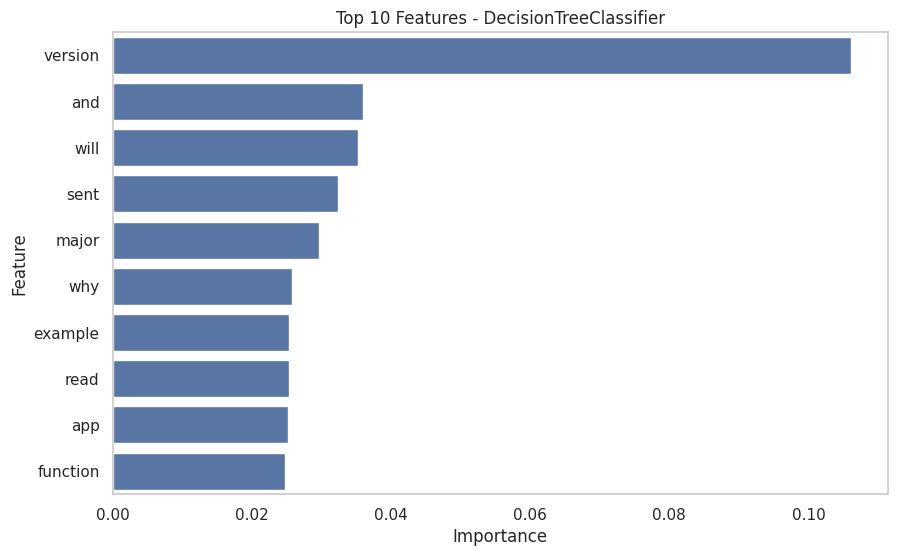

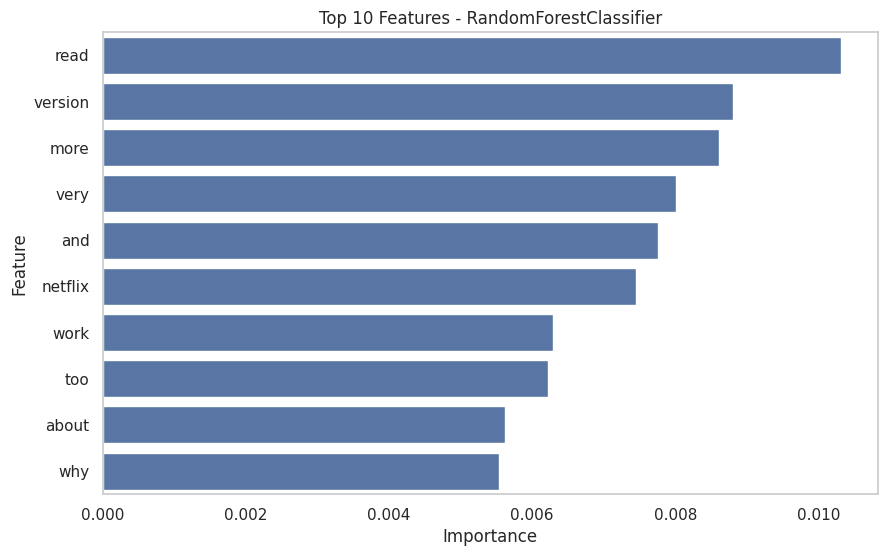

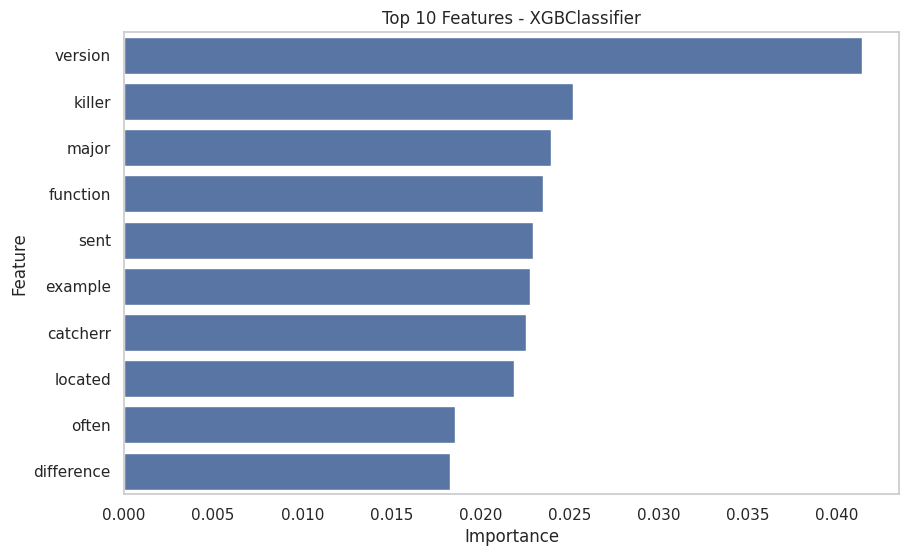

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.942166
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.931958
[LightGBM] [Debug] init for col-wise cost 0.023506 seconds, init for row-wise cost 0.017491 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 19993
[LightGBM] [Info] Number of data points in the train set: 1277, number of used features: 1120
[LightGBM] [Info] Start training from score -2.641409
[LightGBM] [Info] Start training from score -3.323627
[LightGBM] [Info] Start training from score -0.113485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and depth = 13
[LightGBM] [Warning] No further splits 

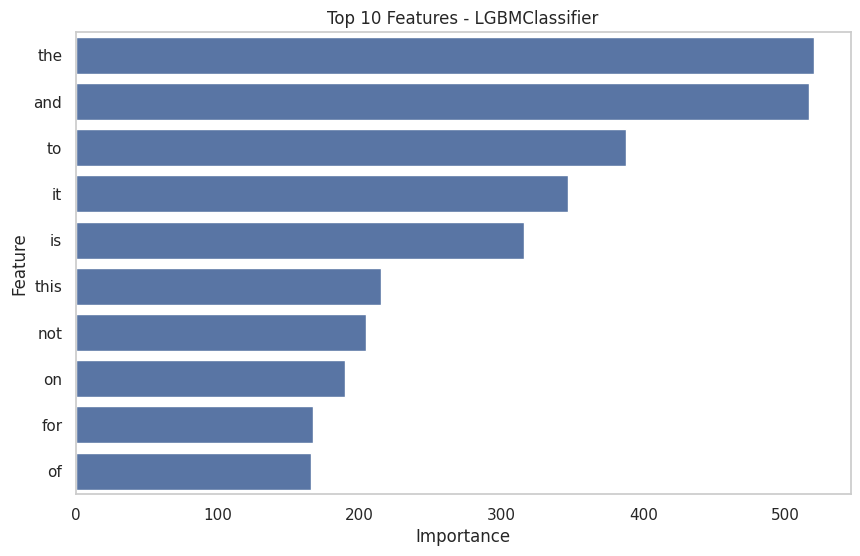

In [84]:
models_with_feature_importances = [("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
                                   ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
                                   ("XGBClassifier", XGBClassifier(random_state=42)),
                                   ("LGBMClassifier", LGBMClassifier(random_state=42))]

feature_names = tfidf_vectorizer.get_feature_names_out()

for model_name, model in models_with_feature_importances:

    model.fit(X_train, y_train)

    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        print(f"{model_name} does not support feature importances.")
        continue

    feature_importances_df = pd.DataFrame({'Feature': feature_names,
                                           'Importance': feature_importances})

    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10])
    plt.title(f"Top 10 Features - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

Model 1: GaussianNB
Training Accuracy: 0.9671104150352389
Testing Accuracy: 0.884375

Confusion matrix for Model 1: GaussianNB 

 [[ 12   0  19]
 [  0   2   6]
 [ 11   1 269]]


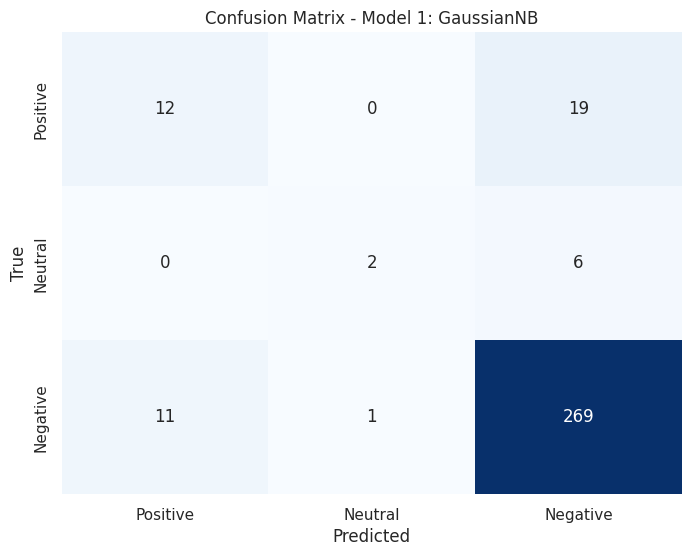

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.884375

Confusion matrix for Model 2: DecisionTreeClassifier 

 [[ 14   1  16]
 [  1   3   4]
 [  5  10 266]]


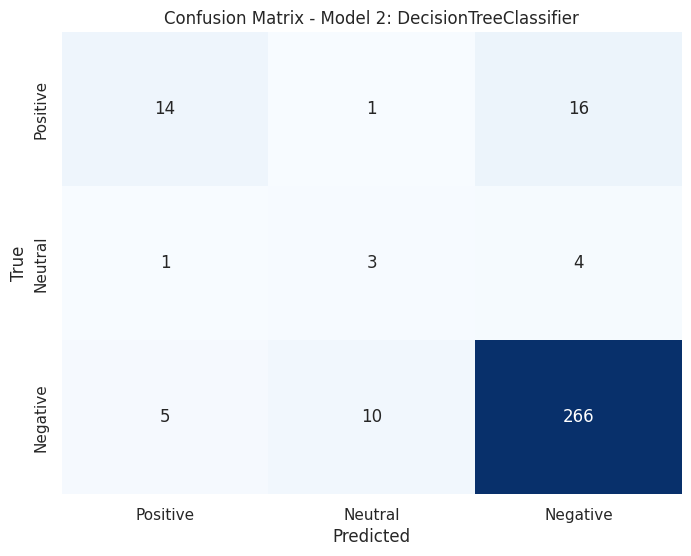

------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.91875

Confusion matrix for Model 3: RandomForestClassifier 

 [[ 11   0  20]
 [  0   2   6]
 [  0   0 281]]


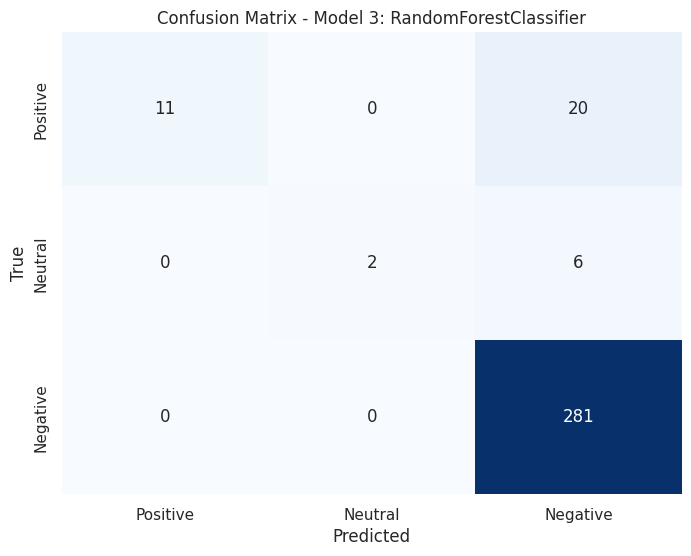

------------------
Model 4: LogisticRegression
Training Accuracy: 0.9177760375880971
Testing Accuracy: 0.90625

Confusion matrix for Model 4: LogisticRegression 

 [[  7   0  24]
 [  0   2   6]
 [  0   0 281]]


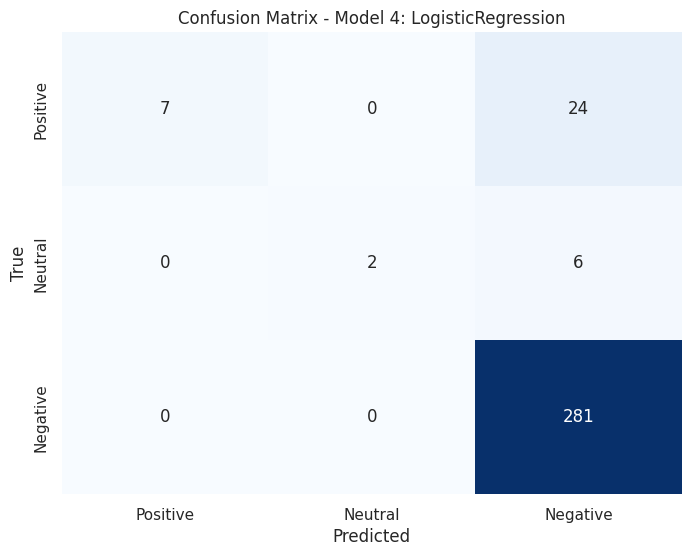

------------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.8888018794048551
Testing Accuracy: 0.8625

Confusion matrix for Model 5: AdaBoostClassifier 

 [[  2   1  28]
 [  0   4   4]
 [ 10   1 270]]


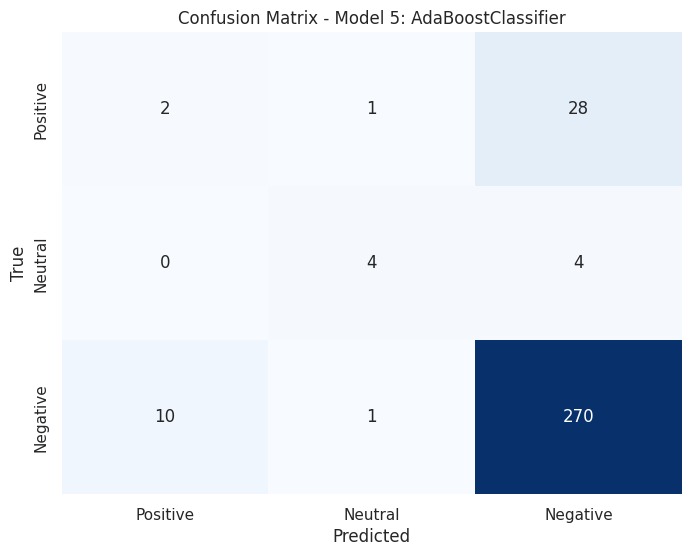

------------------
Model 6: XGBClassifier
Training Accuracy: 0.8927173061863743
Testing Accuracy: 0.878125

Confusion matrix for Model 6: XGBClassifier 

 [[  0   0  31]
 [  0   0   8]
 [  0   0 281]]


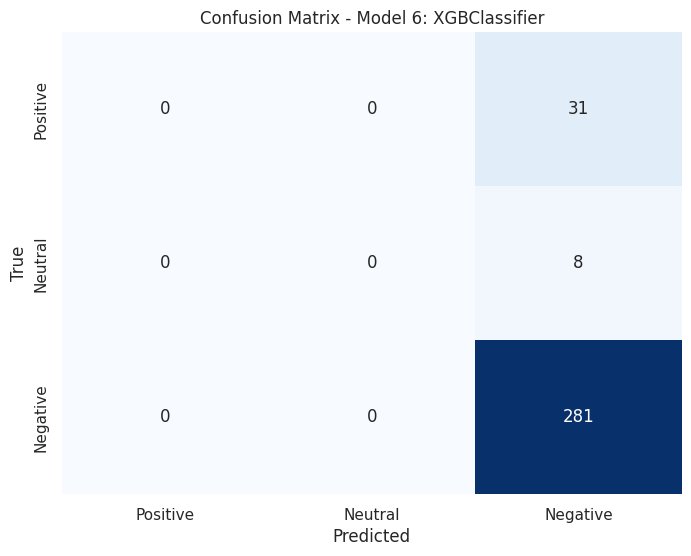

------------------
Model 7: KNeighborsClassifier
Training Accuracy: 0.9075959279561472
Testing Accuracy: 0.89375

Confusion matrix for Model 7: KNeighborsClassifier 

 [[  6   0  25]
 [  1   1   6]
 [  2   0 279]]


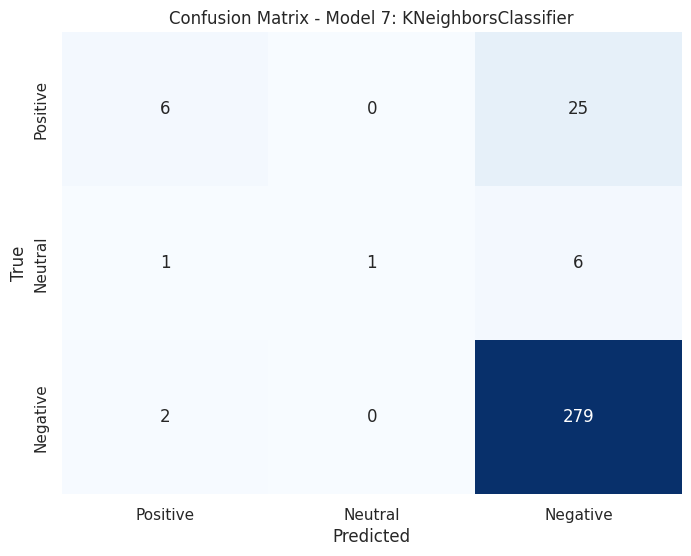

------------------
Model 8: GradientBoostingClassifier
Training Accuracy: 0.9984338292873923
Testing Accuracy: 0.93125

Confusion matrix for Model 8: GradientBoostingClassifier 

 [[ 15   0  16]
 [  0   2   6]
 [  0   0 281]]


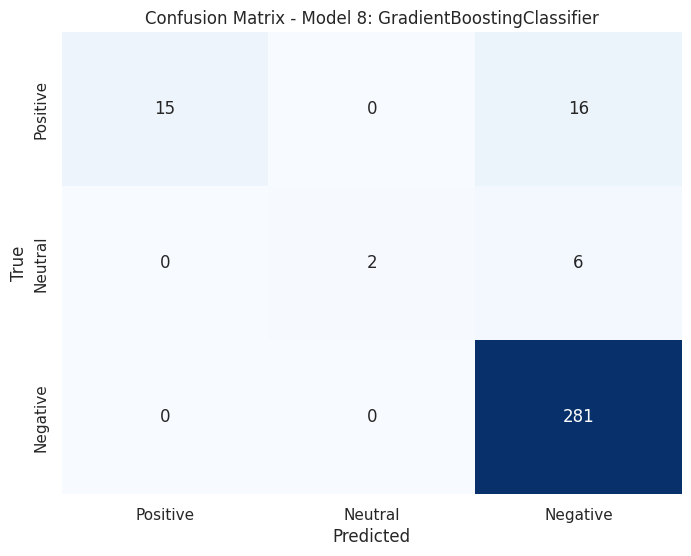

------------------


In [85]:
from sklearn.metrics import confusion_matrix,classification_report

labels = ['Positive',
          'Neutral',
          'Negative']

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

for i, model in enumerate(models):
    if isinstance(model, GaussianNB):
        model.fit(X_train_dense, y_train)
        y_train_pred = model.predict(X_train_dense)
        y_test_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    cm = confusion_matrix(y_test, y_test_pred)

    print(f'Confusion matrix for Model {i+1}: {type(model).__name__} \n\n', cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)

    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()

    print("------------------")

Model 1: GaussianNB
Training Accuracy: 0.9671
Testing Accuracy: 0.8844


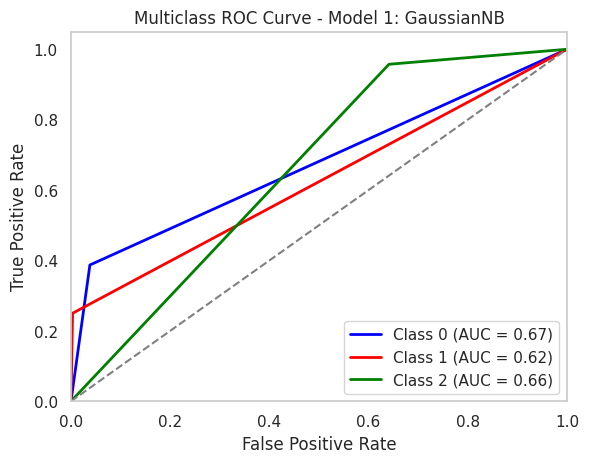

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8844


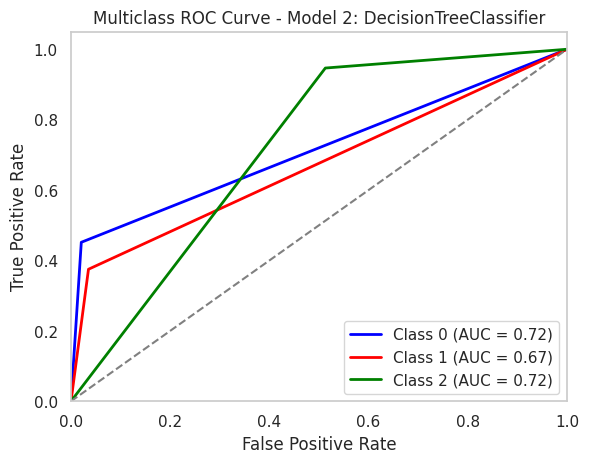

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.9381
Testing Accuracy: 0.9031


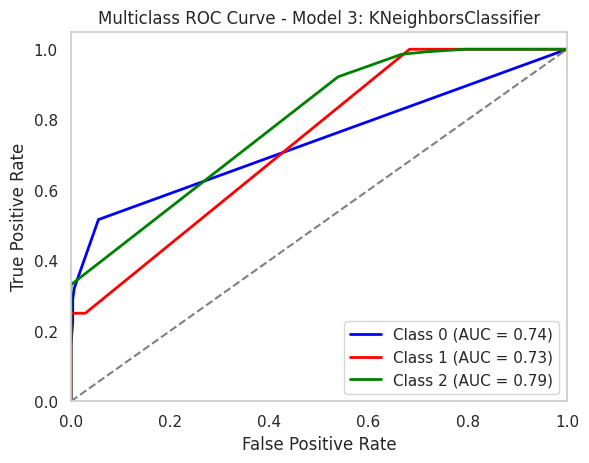

------------------
Model 4: RandomForestClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.9187


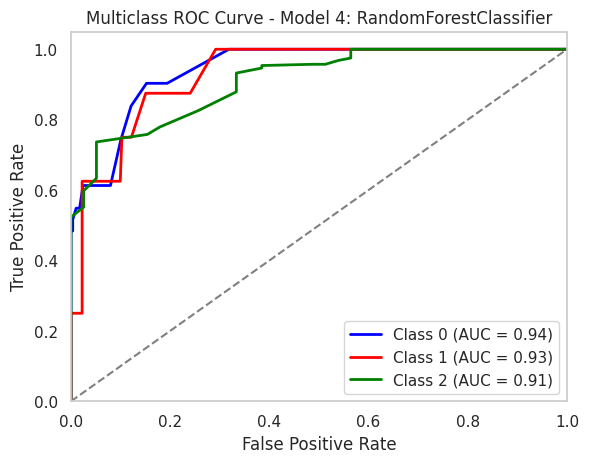

------------------
Model 5: LogisticRegression
Training Accuracy: 0.9178
Testing Accuracy: 0.9062


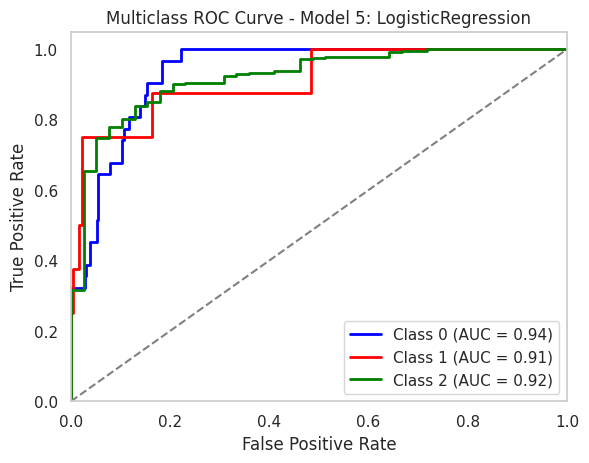

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.8888
Testing Accuracy: 0.8625


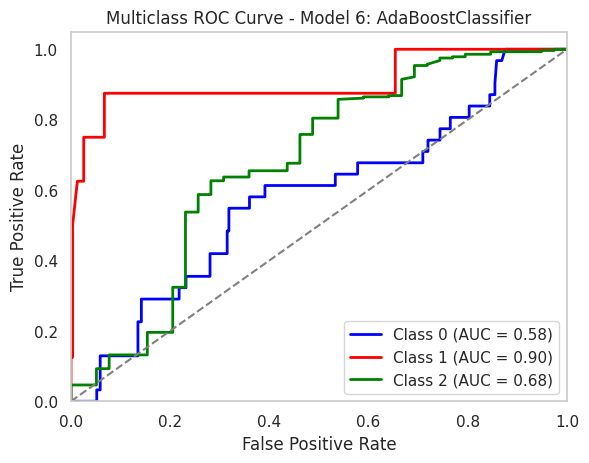

------------------
Model 7: GradientBoostingClassifier
Training Accuracy: 0.9984
Testing Accuracy: 0.9313


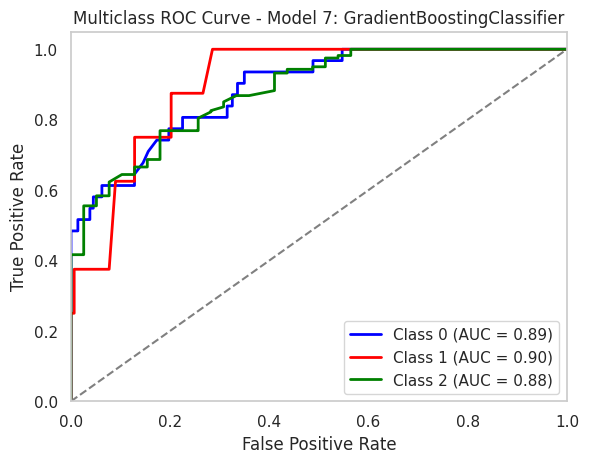

------------------
Model 8: XGBClassifier
Training Accuracy: 0.9992
Testing Accuracy: 0.9250


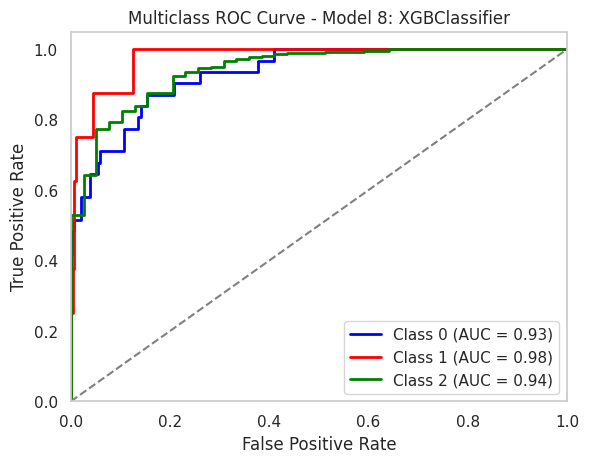

------------------
Model 9: LGBMClassifier
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.942166
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.931958
[LightGBM] [Debug] init for col-wise cost 0.010606 seconds, init for row-wise cost 0.011205 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 19993
[LightGBM] [Info] Number of data points in the train set: 1277, number of used features: 1120
[LightGBM] [Info] Start training from score -2.641409
[LightGBM] [Info] Start training from score -3.323627
[LightGBM] [Info] Start training from score -0.113485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and depth =

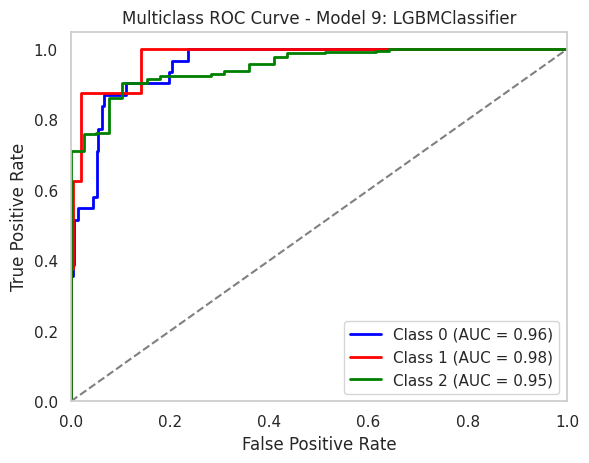

------------------
Model 10: CatBoostClassifier
Training Accuracy: 0.9992
Testing Accuracy: 0.9281


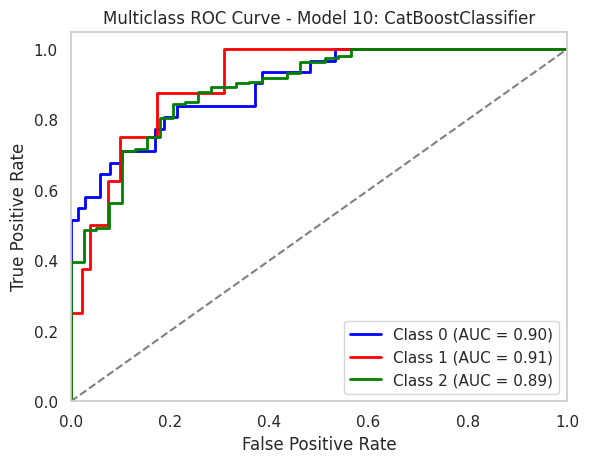

------------------


In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

n_classes = len(np.unique(y_train))

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42, max_iter=1000),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier(),
    CatBoostClassifier(task_type='GPU', iterations=1000, learning_rate=0.1, depth=6, verbose=0, random_state=42)
]

for i, model in enumerate(models):
    print(f"Model {i+1}: {type(model).__name__}")

    if isinstance(model, (GaussianNB, KNeighborsClassifier)):
        model.fit(X_train_dense, y_train)
        y_train_pred = model.predict(X_train_dense)
        y_test_pred = model.predict(X_test_dense)
        y_probs = model.predict_proba(X_test_dense)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_probs = model.predict_proba(X_test)
        else:
            print(f"{type(model).__name__} does not support predict_proba, skipping AUC/ROC plot.")
            continue

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")

    if 'y_probs' in locals():
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for j in range(n_classes):
            fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_probs[:, j])
            roc_auc[j] = roc_auc_score(y_test_bin[:, j], y_probs[:, j])

        plt.figure()
        colors = ['blue', 'red', 'green']
        for j, color in enumerate(colors):
            plt.plot(fpr[j], tpr[j], color=color, lw=2, label=f'Class {j} (AUC = {roc_auc[j]:.2f})')

        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Multiclass ROC Curve - Model {i+1}: {type(model).__name__}')
        plt.legend(loc="lower right")
        plt.grid(False)
        plt.show()

    print("------------------")

In [87]:
sentiment_labels = ['Positive', 'Neutral', 'Negative']

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42, max_iter=1000),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier(),
          CatBoostClassifier(task_type='GPU', iterations=1000, learning_rate=0.1, depth=6, verbose=0, random_state=42)]

for i, model in enumerate(models):

    print(f"Model {i+1}: {type(model).__name__}")

    if isinstance(model, (GaussianNB, KNeighborsClassifier)):
        model.fit(X_train_dense, y_train)
        y_train_pred = model.predict(X_train_dense)
        y_test_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    report = classification_report(y_test, y_test_pred, target_names=sentiment_labels)
    print()
    print("Classification Report:")
    print(report)
    print("=======================================")

Model 1: GaussianNB
Training Accuracy: 0.9671104150352389
Testing Accuracy: 0.884375

Classification Report:
              precision    recall  f1-score   support

    Positive       0.52      0.39      0.44        31
     Neutral       0.67      0.25      0.36         8
    Negative       0.91      0.96      0.94       281

    accuracy                           0.88       320
   macro avg       0.70      0.53      0.58       320
weighted avg       0.87      0.88      0.87       320

Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.884375

Classification Report:
              precision    recall  f1-score   support

    Positive       0.70      0.45      0.55        31
     Neutral       0.21      0.38      0.27         8
    Negative       0.93      0.95      0.94       281

    accuracy                           0.88       320
   macro avg       0.61      0.59      0.59       320
weighted avg       0.89      0.88      0.88       320

Model 3: KNeighborsClas

In [88]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

models = [GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42, max_iter=1000),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42),
          LGBMClassifier()]

metricas = []

for model in models:
    print(f"Evaluating {type(model).__name__}")

    if isinstance(model, (GaussianNB, KNeighborsClassifier)):
        model.fit(X_train_dense, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train_dense))
        test_accuracy = accuracy_score(y_test, model.predict(X_test_dense))
        report = classification_report(y_test, model.predict(X_test_dense), output_dict=True)
    else:
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        report = classification_report(y_test, model.predict(X_test), output_dict=True)

    metrics = {"Model": type(model).__name__,
               "Accuracy": test_accuracy,
               "Precision": report['weighted avg']['precision'],
               "Recall": report['weighted avg']['recall'],
               "F1-score": report['weighted avg']['f1-score'],
               "Support": report['weighted avg']['support']}
    metricas.append(metrics)

df_metricas = pd.DataFrame(metricas)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

df_metricas_styled

Evaluating GaussianNB
Evaluating DecisionTreeClassifier
Evaluating KNeighborsClassifier
Evaluating RandomForestClassifier
Evaluating LogisticRegression
Evaluating AdaBoostClassifier
Evaluating XGBClassifier
Evaluating GradientBoostingClassifier
Evaluating LGBMClassifier
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.942166
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.931958
[LightGBM] [Debug] init for col-wise cost 0.029435 seconds, init for row-wise cost 0.028602 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 19993
[LightGBM] [Info] Number of data points in the train set: 1277, number of used features: 1120
[LightGBM] [Info] Start training from score -2.641409
[LightGBM] [Info]

,Model,Accuracy,Precision,Recall,F1-score,Support
0,GaussianNB,0.884375,0.870665,0.884375,0.873766,320.000000
1,DecisionTreeClassifier,0.884375,0.889887,0.884375,0.883924,320.000000
2,KNeighborsClassifier,0.903125,0.893504,0.903125,0.885766,320.000000
3,RandomForestClassifier,0.918750,0.925631,0.918750,0.900040,320.000000
4,LogisticRegression,0.906250,0.915293,0.906250,0.879316,320.000000
5,AdaBoostClassifier,0.862500,0.817891,0.862500,0.836655,320.000000
6,XGBClassifier,0.925000,0.921430,0.925000,0.912840,320.000000
7,GradientBoostingClassifier,0.931250,0.936242,0.931250,0.918224,320.000000
8,LGBMClassifier,0.928125,0.924179,0.928125,0.917429,320.000000


In [90]:
with open("vectorizer.pkl", "wb") as f:
  pickle.dump(tfidf_vectorizer, f)

In [91]:
import pickle

for i, model in enumerate(models):

    if isinstance(model, GaussianNB):
        model.fit(X_train_dense, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train_dense))
        test_accuracy = accuracy_score(y_test, model.predict(X_test_dense))
    else:
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print("-----------------")

    model_filename = f"model_{type(model).__name__}.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
        print(f"Model {type(model).__name__} saved as {model_filename}")

Model 1: GaussianNB
-----------------
Model GaussianNB saved as model_GaussianNB.pkl
Model 2: DecisionTreeClassifier
-----------------
Model DecisionTreeClassifier saved as model_DecisionTreeClassifier.pkl
Model 3: KNeighborsClassifier
-----------------
Model KNeighborsClassifier saved as model_KNeighborsClassifier.pkl
Model 4: RandomForestClassifier
-----------------
Model RandomForestClassifier saved as model_RandomForestClassifier.pkl
Model 5: LogisticRegression
-----------------
Model LogisticRegression saved as model_LogisticRegression.pkl
Model 6: AdaBoostClassifier
-----------------
Model AdaBoostClassifier saved as model_AdaBoostClassifier.pkl
Model 7: XGBClassifier
-----------------
Model XGBClassifier saved as model_XGBClassifier.pkl
Model 8: GradientBoostingClassifier
-----------------
Model GradientBoostingClassifier saved as model_GradientBoostingClassifier.pkl
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.942166
[LightGBM] [Debug] Dataset::GetMu

In [98]:
models

[GaussianNB(),
 DecisionTreeClassifier(random_state=42),
 KNeighborsClassifier(),
 RandomForestClassifier(random_state=42),
 LogisticRegression(max_iter=1000, random_state=42),
 AdaBoostClassifier(random_state=42),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='multi:softprob', ...),
 Gradi

In [108]:
review = "Very good product"
review = tfidf_vectorizer.transform([review])

models[-1].predict(review)

array([1])

In [104]:
review = "I am enjoying it so far. Great for reading. Had the original Fire since 2012."
review = tfidf_vectorizer.transform([review])

models[-1].predict(review)

array([2])